# Example

Example notebook for torch_trainer module

In [1]:
# Imports
import numpy as np
import torch
import torch_trainer as tt
import matplotlib.pyplot as plt

### Create a simple dataset

torch_trainer can take data as numpy arrays or torch tensors

In [2]:
nPoints = 100
x = np.random.uniform(-3, 3, nPoints)
y = np.sin(x) + np.random.normal(0, 0.1, nPoints)

# For plotting
xx = np.arange(-3, 3, 0.01)

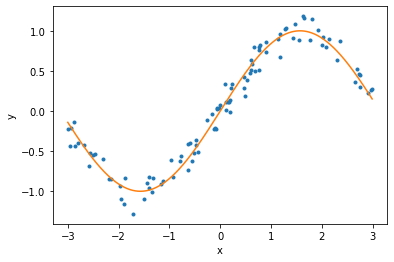

In [3]:
fig = plt.figure()
plt.plot(x, y, '.', label = 'Data')
plt.plot(xx, np.sin(xx), label = 'Truth')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Create a simple torch model

In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 1),
)

### Create trainer object

In [5]:
trainer = tt.Trainer(model, batch_size=8)

### Add the data 

Using 20% for testing

In [6]:
trainer.add_data(x=x.reshape(-1, 1), y=y.reshape(-1, 1), split=0.2)

### Train

In [7]:
trainer.train(patience=20)

Batch:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping after 86 epochs.


### Check performance

In [8]:
x_val = torch.rand(20)*6-3
y_val = torch.sin(x_val)
y_pred = model(x_val.reshape(-1, 1))

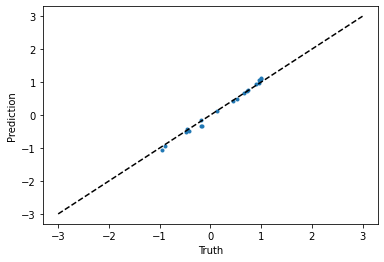

In [9]:
fig = plt.figure()
plt.plot(y_val.detach().numpy(), y_pred.detach().numpy(), '.')
plt.plot([-3, 3], [-3, 3], ls = '--', color = 'k')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()